# Heart Disease Prediction Model

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. 
Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients 
and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease
as well as predict the overall risk using logistic regression. The daset can be downloaded from the link https://raw.githubusercontent.com/matackett/sta210/master/data/framingham.csv
and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Predict variable (desired target) in our data set is 
10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”).
As part of the Analysis on the missing values, we'll identify the no. of rows that have null values for atleast one column and drop them if they are not in significant number. Also, we'll perform EDA to see how the values are distributed for each column including the target variable. We'll divide the data set into training and test sets. Fit the model on the training data set and predict the values on the test data set using the model. We'll then evaluate the model by calculating the model accuracy and by showing the confusion matrix and the ROC curve. We'll implement several learnings from the course. 

In [1]:
# Read the data
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset=pd.read_csv('framingham.csv')
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<ipython-input-2-01d6beca37f5>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax = ax)


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

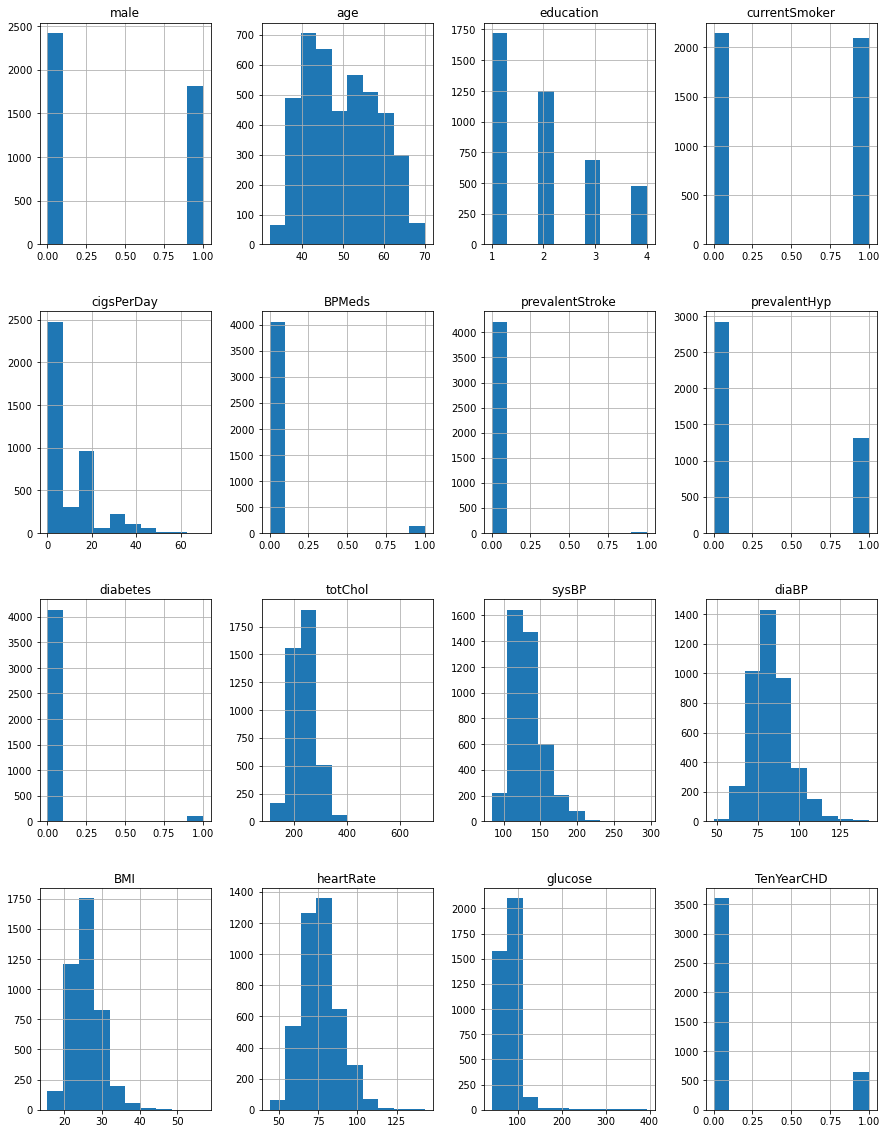

In [2]:
# checking distributions using histograms

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

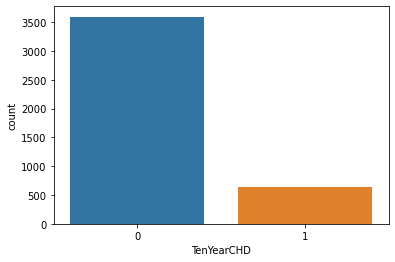

In [3]:
sns.countplot(x='TenYearCHD',data=dataset)

There are 3179 patents with no heart disease and 572 patients with risk of heart disease.

<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

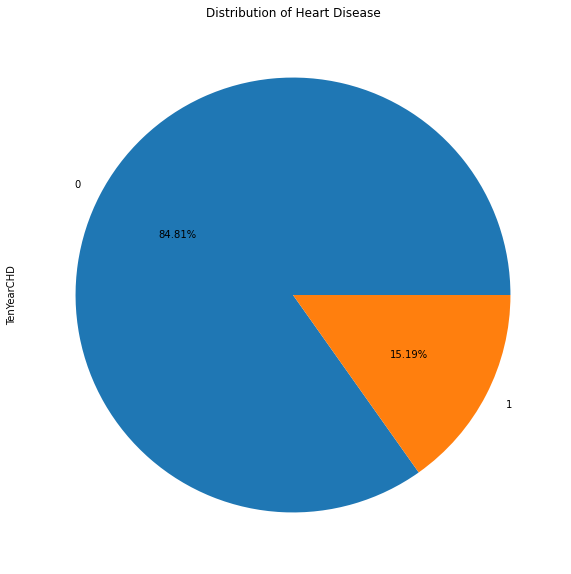

In [4]:
## Distribution of heart diseases in %
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
dataset["TenYearCHD"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The above plot shows that a total of 84.81% are healthy and the remaining are suffering from heart disease.

<AxesSubplot:title={'center':'Male Distribution'}, ylabel='male'>

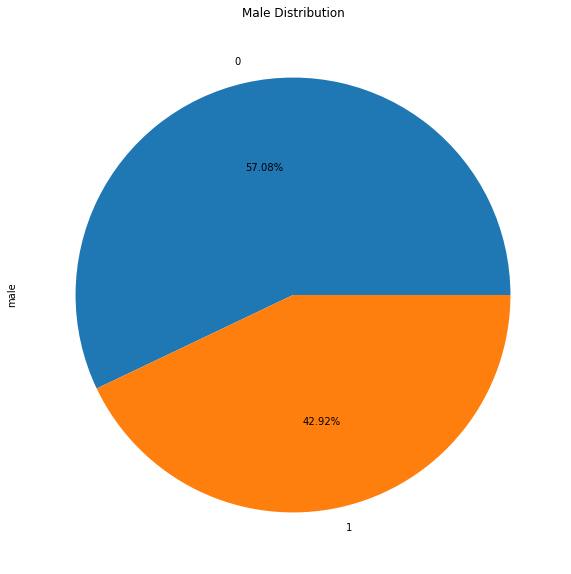

In [5]:
## Male population distribution
plt.figure(figsize=(10,10))
plt.title("Male Distribution")
dataset["male"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The difference between no. of males and females in the dataset is not much.

<AxesSubplot:title={'center':'Smoker Distribution'}, ylabel='currentSmoker'>

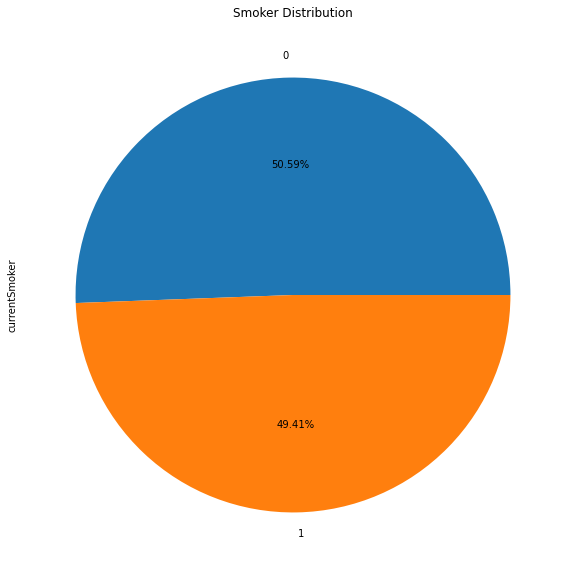

In [6]:
## Currently Smokers distribution
plt.figure(figsize=(10,10))
plt.title("Smoker Distribution")
dataset["currentSmoker"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The pie chart indicates that 50.59% of the population currently are smokers and 49.11% are non smokers. 
There is no significant difference between currently smokers and non smokers.

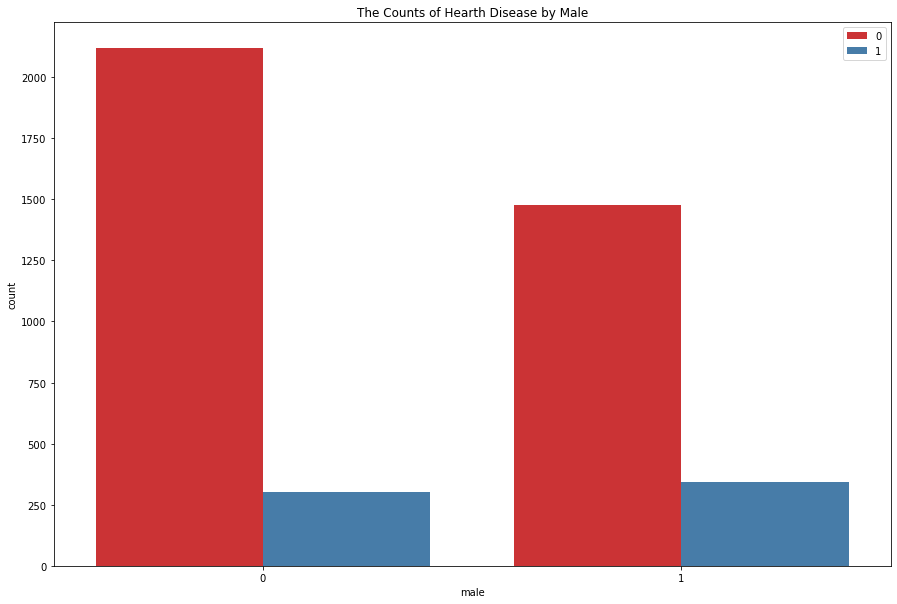

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(x="male",hue="TenYearCHD", data=dataset, palette="Set1")
plt.title("The Counts of Hearth Disease by Male")
plt.legend()

# Overview

Overall the quality of the data looks good. There are few rows that have null values for the columns. These rows are removed to avoid any noise in the data. Also, Based on the above plotted graphs, we can say that there a few fields that have correlation with the Heart disease such as age,sysBP,prevalentHyp,diaBP,glucose, male. 

# Milestone 2

In [8]:
## Drop any features that are not useful for your model building and explain why they are not useful
## Dropped the column 'education' as it don't have 

dataset.drop(['education'],axis=1,inplace=True)
dataset.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
# Perform any data extraction/selection steps.

# Filter the rows where the age of the participants in greater than or equal to 60. 
# This is just to check the no. of adults more than 60 in the data but not to use in the model

dataset[dataset['age']>=60]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
26,0,60,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
28,0,61,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
29,0,60,0,0.0,0.0,0,0,0,247.0,130.0,88.0,30.36,72.0,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,1,65,0,0.0,0.0,0,0,0,286.0,135.0,80.0,28.06,70.0,116.0,0
4215,0,63,0,0.0,0.0,0,1,1,236.0,155.0,82.0,39.17,78.0,79.0,0
4217,0,63,0,0.0,0.0,0,1,0,266.0,167.0,94.0,25.23,95.0,94.0,0
4220,1,60,0,0.0,0.0,0,0,0,252.0,128.0,82.0,21.18,75.0,70.0,1


In [10]:
# Transform features if necessary.

# I'm renaming the column 'male' to 'gender'. 

dataset.rename(columns={'male':'gender'},inplace=True)
dataset.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Engineer new useful features


We do not need any new features at this point and hence not creating any new features out of this data set. 

<AxesSubplot:>

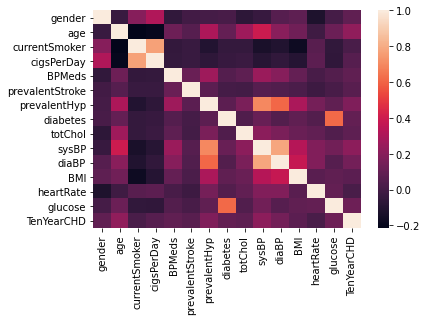

In [11]:
# check which features are correlated with each other and are correlated with the outcome variable
df_corr = dataset.corr()
sns.heatmap(df_corr)

#The above plot is to show the correlation between all the features in the dataset.

In [12]:
#Here we can see the correlations between features and hearth disease
dataset.corr()["TenYearCHD"].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
gender             0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
heartRate          0.022907
currentSmoker      0.019448
Name: TenYearCHD, dtype: float64

## According to these values above and in the figure below,people tend to have hearth disease if

they are older                
they have higher systolic blood pressure 
they are hypertensive 
they have higher diastolic blood pressure
they have higher glucose level glucose           
they have diabetes           
they are males 

In [13]:
# Deal with missing data

dataset.isnull().sum()

gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values: ', count)
print('It is',round((count/len(dataset.index))*100), 'percent of the entire dataset.')

Total number of rows with missing values:  489
It is 12 percent of the entire dataset.


Since the missing data set is only 12% of the entire dataset and as we want out to be as clean as possible, I'll be dropping the rows that has any missing values.

In [15]:
# Dropping all the rows that has the missing values

dataset.dropna(axis=0,inplace=True)

# Create dummy variables if necessary.

In the data set that we have, we do not have any categorical variables. Hence there is no need of introduction of Dummy variables.

# Milestone 3

In [16]:
# Split the data into a training and test set, where the SalePrice column is the target.
# Divide the data set into train and test in 75:25 ratio

import sklearn
from sklearn.model_selection import train_test_split

target = dataset.TenYearCHD
features=dataset.drop('TenYearCHD',axis=1)

#splitting
prefeatures_train,features_test,pretarget_train,target_test=train_test_split(features,target,test_size=0.25,random_state=1)

#printing shapes of testing and training sets :
print("shape of original dataset :", dataset.shape)
print("shape of input - training set", prefeatures_train.shape)
print("shape of output - training set", pretarget_train.shape)
print("shape of input - testing set", features_test.shape)
print("shape of output - testing set", target_test.shape)

shape of original dataset : (3751, 15)
shape of input - training set (2813, 14)
shape of output - training set (2813,)
shape of input - testing set (938, 14)
shape of output - testing set (938,)


# SMOTE added after milestone 3 feedback and all steps are recalculated

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
features_train, target_train = sm.fit_resample(prefeatures_train, pretarget_train)

<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

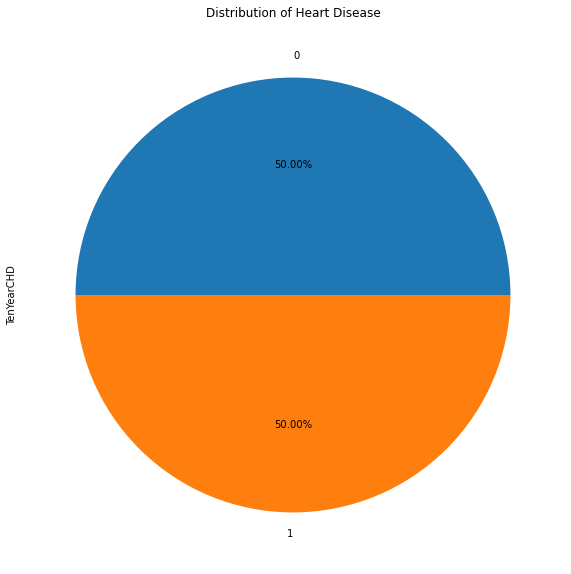

In [24]:
## Distribution of heart diseases in % after applying SMOTE
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
target_train.value_counts().plot(kind="pie",autopct='%1.2f%%')

In [18]:
# Fit and transform the training features with a PCA so that 90% of the variance is retained
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features_train_scaled = StandardScaler().fit_transform(features_train)

# Create a PCA that will retain 90% of variance
pca = PCA(n_components=0.90, whiten=True)

# Conduct PCA
features_train_pca = pca.fit_transform(features_train_scaled)
# Show results
print("Original number of features:", features_train.shape[1])
print("Reduced number of features:", features_train_pca.shape[1])

Original number of features: 14
Reduced number of features: 10


In [19]:
# Transform but DO NOT fit the test features with the same PCA

features_test_scaled = StandardScaler().fit_transform(features_test)
features_test_pca = pca.transform(features_test_scaled)

We have selected the logistic regression model for our problem as this is a classification problem. This is a supervised classification algorithm as we provide the training data initially and use the model to predict on the test data. Later we'll be using the confusion matrix to understand the true and false predictions. 

In [20]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(features_train_pca,target_train)
target_pred=logreg.predict(features_test_pca)
sklearn.metrics.accuracy_score(target_test,target_pred)

0.5842217484008528

<AxesSubplot:>

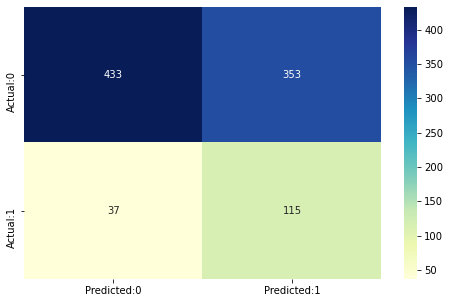

In [21]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test,target_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## The confusion matrix shows 433+115 = 548 correct predictions and 353+37= 390 incorrect ones.

## True Positives: 115

## True Negatives: 433

## False Positives: 353

## False Negatives: 37

Here we used the Logistic regression and got an accuracy of 58% which means that it is a good model. Our model has predicted 548 correct predictions and a total of 390 incorrect predictions. We used PCA tranformed data with variance of 90 %. The % of variance explained by the PCA representation reflect the % of information that this representation bring about the original structure. Higher is the % of variance, higher is the % of information and less is the information loss. The minimum % suggested is 60% but we took 90% which means that the attributes we get will be useful.

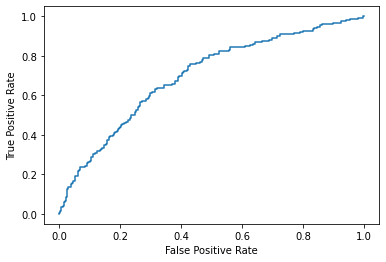

In [22]:
# plot ROC curve
from sklearn.metrics import roc_curve

y_pred_proba = logreg.predict_proba(features_test_pca)[::,1]
fpr, tpr, _ = roc_curve(target_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
# Calculating Area under Curve
sklearn.metrics.roc_auc_score(target_test, y_pred_proba)

0.6970168742466855

The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better. Our Model stands at 71% which means that it is a good model.